<a href="https://colab.research.google.com/github/sarthakakre27/Face-Recognition-CNN-Attendance-System/blob/main/Automated_Attendance_System_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**NFT Project** on **Automated Attendance System** using **CNN** Model
<br>
<h4>Made in Guidance of - </h4>
<h3>Dr. Poonam Sharma (Professor)</h3>
<h3>Santosh Sahu Sir (TA)</h3>
<br>

<h4>Submitted By - </h4>
<h3>Sarthak Akre (BT19CSE099) , Gourav Chayande (BT19CSE021) , Nilesh Palandurkar (BT19CSE074)</h3>



# Implementation of face recognition using neural net 

In this project an Automated Attendance Marking System is to be designed using Face detection and Recognition technology. Taking attendance in a large class is cumbersome, repetitive, and it consumes valuable class time. To avoid these problems, we are tasked with developing an automatic attendance system using deep learning framework. An automatic attendance system based on the image processing consists of two steps: face detection and face recognition.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#to make plots appear inline in the notebook
%matplotlib inline

In [ ]:
#we are importing important libraries such as cv,numpy,os,sklearn etc
#cv for face detection and preprocessing
import cv2
#numpy for data managing using arrays
import numpy as np
#os to input data locally
import os
#sk image for reading images into format suitable for training 
from skimage import io
#to make training and testing data from overall pool of data
from sklearn.model_selection import train_test_split
#to plot graphs
import matplotlib.pyplot as plt

In [ ]:
#As we are using keras to help train our model we have to import those libraries as well
import keras
from keras.models import Sequential, load_model #sequential layers in CNN, load the computed model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation #layers, functions, utilities for each layer
#from keras.models import Sequential
from tensorflow.keras.optimizers import Adam #optimizer for the network
from keras.callbacks import TensorBoard
from keras.utils import np_utils #convert to one-hot-vector
#from keras.layers import Dense, Dropout, Activation
#from PIL import Image

## Listing the path of all the images

Now that we have all the libraries ready, we will first start by importing all the images into our project.

For this we have used os library, and imported all the images into an array.

In [ ]:
#make an array for all the files 
PathForDatasetArr = []
dir_path = "/content/drive/MyDrive/sem 5/NFT/googleColab/yalefaces"

#using the os library add all the paths of the files in the specified directory to our array
for k in os.listdir(dir_path):
    PathForDatasetArr.append(os.path.join(dir_path, k))

## Reading each image and assigning respective labels

Now that each image path has been loaded we can start working on the images themselves.

To make the images readable and have the data as clean as possible we will have to do preprocessing.

But first lets have the labels for the corresponing data.

In [ ]:
#setting up the arrays for the image matrices and their correspinding labels

#an array for storing all the images themselves from the path 
Arr_ImageMatrices = []

#an array for storing all the corresponding labels to said images
Arr_ImageLabels = []

###About the dataset:
We are using Yale Faces dataset.

<div>
<h2></h2>
<img src="https://www.researchgate.net/profile/Adrian-Bors/publication/233545388/figure/fig4/AS:670337972858889@1536832435447/Images-from-the-Yale-face-database-a-Original-data-set-b-Reconstructed-faces-from.ppm" width="1000" height="1000"/>
</div>


The Yale Face Database contains 165 grayscale images in GIF format of 15 individuals. There are 11 images per subject, one per different facial expression or configuration: center-light, w/glasses, happy, left-light, w/no glasses, normal, right-light, sad, sleepy, surprised, and wink.


####Details of above:

Color Images:	No	
Image Size:	320 x 243 	
Number of unique people:	15	
Number of pictures per person:	11
Different Conditions:	center-light, w/glasses, happy, left-light, w/no glasses, normal, right-light, sad, sleepy, surprised, wink	
Citation reference:	P. N. Bellhumer, J. Hespanha, and D. Kriegman. Eigenfaces vs. fisherfaces: Recognition using class specific linear projection. IEEE Transactions on Pattern Analysis and Machine Intelligence, Special Issue on Face Recognition, 17(7):711--720, 1997. 

For more information click [here.](http://vision.ucsd.edu/content/yale-face-database)

In [ ]:
for k in PathForDatasetArr:
    temp_ImgRead = io.imread(k,as_grey=True,plugin="pil")#all the images are grey but still to be safer as_grey is used with python imaging library plugin
    #we use imread to read the image file and store image data(Matrix) in the array
    Arr_ImageMatrices.append(temp_ImgRead)
    
    #the processing of data was simple in our case as the dataset had convient naming convention
    #we just split the path and made the subject value decremented by 1 as our class name or label
    temp_LabelRead = int(os.path.split(k)[1].split(".")[0].replace("subject", "")) - 1
    Arr_ImageLabels.append(temp_LabelRead)

In [ ]:
#we can see all the labels have been assigned correctly
print(PathForDatasetArr[99])#subject number 10 as seen in the path
print(Arr_ImageLabels[99])#labeled as person number 9 (array index  -> 10th subject)

/content/drive/MyDrive/sem 5/NFT/googleColab/yalefaces/subject10.centerlight
9


##Preprocessing the DATASET: Face Detection using OpenCV and cropping the image to a size of 150 x 150

Now that we have our images and labels assigned correctly we need to "clean up" or pre process the images so that model is trained correctly.

For this purpose we are using openCV. OpenCV has a lot of useful features related to object detection, face detection etc.

<div>
<img src="https://miro.medium.com/max/1156/1*XX8WqHo0lyrgZfTTRQ3ESQ.jpeg" width="400"/>
</div>

We will use a face detection classifier called as Haarcascade.
Haar cascades, first introduced by Viola and Jones in their seminal 2001 publication, Rapid Object Detection using a Boosted Cascade of Simple Features, are arguably OpenCV’s most popular object detection algorithm.



Some Haar cascade benefits are that they’re very fast at computing features, they can detect faces in images regardless of the location or scale of the face and are capable of running in real-time.

<div>
<img src="https://929687.smushcdn.com/2407837/wp-content/uploads/2014/10/sliding_window_example.gif?size=323x475&lossy=1&strip=1&webp=0" height="350"/>
</div>



In [ ]:
faceDetectClassifier = cv2.CascadeClassifier("/content/drive/MyDrive/sem 5/NFT/googleColab/dataset2/haarcascade_frontalface_default.xml")

Haar Cascacde is trained classifiers for detecting objects of a particular type, in our case we want it to detect faces.
Even in faces there are many orientations, we have chosen frontal face detection.

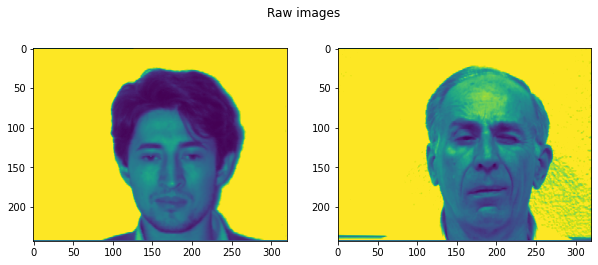

In [ ]:
#here we can see the image before filtering
fig = plt.figure(figsize=(10, 4))
fig.suptitle('Raw images')

#plotting first image
fig.add_subplot(1, 2, 1)
plt.imshow(Arr_ImageMatrices[22])

#plotting second image
fig.add_subplot(1, 2, 2)
plt.imshow(Arr_ImageMatrices[54])
#in the images below we can see the unprocessed images at index 22 an 54 of our images array
#and haarcascade helps in face detection and thus cropping to 150x150 sized images

In [ ]:
#we will store the filtered images in a new array --> Arr_ImageMatricesFin
Arr_ImageMatricesFin = []

for img in Arr_ImageMatrices:
    #we are just applying the filter to all the images and storing the output
    detectedFacePointsArr = faceDetectClassifier.detectMultiScale(img) #returns array of the face detection guesses
    x,y = detectedFacePointsArr[0][:2] #extracting the top left point for the detected face
    #the images are not of desired shape so we crop into the detected face to change the size to 150x150
    croppedImg = img[y: y + 150, x: x + 150] #cropping 150px in x and y direction(left and down direction)
    Arr_ImageMatricesFin.append(croppedImg)

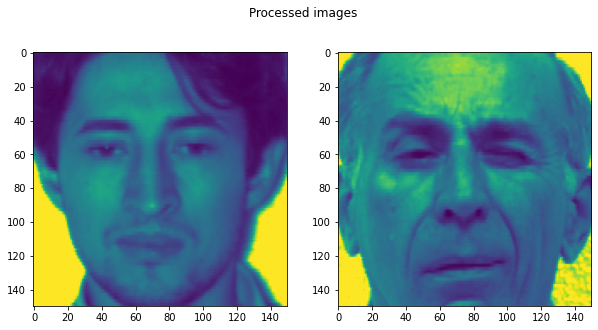

In [ ]:
#here is the image after cropping
fig = plt.figure(figsize=(10, 5))
fig.suptitle('Processed images')

#plotting first processed image
fig.add_subplot(1, 2, 1)
plt.imshow(Arr_ImageMatricesFin[22])

#plotting second processed image
fig.add_subplot(1, 2, 2)
plt.imshow(Arr_ImageMatricesFin[54])
#in the below output we can see that haarcascade has detected the faces correctly 
#and we have cropped them into 150x150 sized image matrices

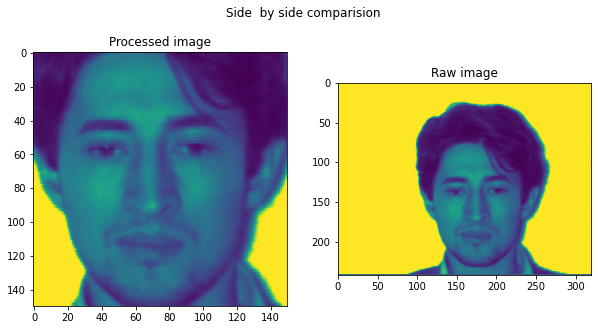

In [ ]:
#a side by side comparision:
fig = plt.figure(figsize=(10, 5))
fig.suptitle('Side  by side comparision')

fig.add_subplot(1, 2, 1)
plt.title("Processed image")
plt.imshow(Arr_ImageMatricesFin[22])

fig.add_subplot(1, 2, 2)
plt.title("Raw image")
plt.imshow(Arr_ImageMatrices[22])

#Using Convolutional Neural Network(CNN) to classify faces of subjects(students in our case - label)


Now that we have the data preprocessed and ready to be used we will try to classify the images to the people they coresspond to.

To do this we are using keras and tensorflow.

## Splitting Dataset into train and test

<div>
<h2></h2>
<img src="https://d33wubrfki0l68.cloudfront.net/c39b2d19183ed14141a8b7b03943442d40efee0d/81e2a/wp-content/uploads/2019/03/train_test_split.png" width="450"/>
</div>

For making the model we need to have 2 sets on data one for training and other for testing.

The data in these also needs to be randomly selected so as to avoid overtraining.

To split the testing and training data we use sklearn model_selection and it will give us the split we want for both the labels and images without losing the overall connection between them.

In [ ]:
#here our train:test is 9:1 i.e. 90% of data is for training
#here we are using the sklearn module's train-test split to split aour dataset for training on CNN and for testing it's accuracy
#during the split we are converting the python lists to numpy arrays to reduce the overhead book-keeping on python lists
#so that the numpy arrays help in better performance in calculations
X_train, X_test, y_train, y_test = train_test_split(np.array(Arr_ImageMatricesFin),np.array(Arr_ImageLabels), train_size=0.9, random_state = 42)
#the split, 90% for training is because the yalefaces dataset has very few images and thus we need more images for training

In [ ]:
#checking the dimensions after the train-test split
X_train = np.array(X_train)
X_test = np.array(X_test)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
#149 images for training and 17 images for testing

X_train shape: (149, 150, 150)
X_test shape: (17, 150, 150)


In [ ]:
#number of classes is 15
total_classes = 15
y_train = np.array(y_train) 
y_test = np.array(y_test)
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

y_train shape: (149,)
y_test shape: (17,)



<div>
<img src="https://www.andreaperlato.com/img/onehot%20encode.png" width="600"/>
</div>

In [ ]:
#np_utils.to_categorical is used to convert array of labeled data(from 0 to total_classes - 1) to one-hot vector.
Y_train = np_utils.to_categorical(y_train, total_classes)
Y_test = np_utils.to_categorical(y_test, total_classes)
print(f'Y_train shape: {Y_train.shape}')
print(f'Y_test shape: {Y_test.shape}')
#split for each class corresponding to each vector
print(f'one hot vector - {Y_train[0]}')

Y_train shape: (149, 15)
Y_test shape: (17, 15)
one hot vector - [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
image_rows = 150 #150px height
image_cols = 150 #150px width
batch_size = 64  #train in a batch size of 64 images
image_shape=(image_rows, image_cols, 1) #Rows X Cols X 1(single channel - grayscale images)

#reshaping the matrices to that of te images
X_train = X_train.reshape(X_train.shape[0], *image_shape)
X_test = X_test.reshape(X_test.shape[0], *image_shape)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (149, 150, 150, 1)
X_test shape: (17, 150, 150, 1)


In [ ]:
#normalizing data
X_train = np.array(X_train,dtype='float32')/255 #dividing by 255(pixel range)
X_test = np.array(X_test,dtype='float32')/255 #dividing by 255(pixel range)

In [ ]:
#sanity check for the dimensions of the data to be fed to the model
print(f'X_Train - {X_train.shape}')
print(f'X_test  - {X_test.shape}')
print(f'Y_train - {Y_train.shape}')
print(f'Y_test  - {Y_test.shape}')

X_Train - (149, 150, 150, 1)
X_test  - (17, 150, 150, 1)
Y_train - (149, 15)
Y_test  - (17, 15)


#Making the model


Now we only need to make the model and train it using the above data.
To do the training we are using an  Open  Source  Neural  Network  library  called  Keras  running  on  top  of  Tensorflow.


<h1>Outline images Of CNNs</h1>
<div>
<img src="https://www.researchgate.net/profile/Dina-Abdelhafiz/publication/333645616/figure/fig2/AS:766814099365888@1559834136716/The-CNN-architecture-is-a-stack-of-Convolutional-layer-Conv-Nonlinear-layer-eg.png" width="750"/>

<br>

<img src="https://i0.wp.com/developersbreach.com/wp-content/uploads/2020/08/cnn_banner.png?fit=1400%2C658&#038;ssl=1" width="750"/>
</div>



Convolutional Neural Networks are similar to ordinary neural networks, but with an explicit assumption that the 
inputs are images, allowing designers to encode certain properties into the architecture. CNN architecture comprises 
of  a  sequence  of  layers  with  the  simplest  architecture  being  [INPUT−CONV−RELU−POOL−FC].




![convolution example](https://aigeekprogrammer.com/wp-content/uploads/2019/12/CNN-filter-animation-1.gif)



Input  layer holds the raw pixel values of the images, Conv layer consists of a kernel or filter of a fixed size which slides in a 
window fashion to perform the convolution operation on the windowed image to extract features. Padding is applied onto  the  size  of  input  image  to  overcome  uneven  mapping  with  filter  size.

![conv with padding](https://theano-pymc.readthedocs.io/en/latest/_images/numerical_padding_strides.gif)

Pic: Padding

 RELU  stands  for  rectified  linear  units, 
which  is  an  element  wise  activation  function  that  assigns  zero  value  to  hidden  units.  

POOL  denotes  the  pooling 
layer,  which  is responsible  for down  sampling and dimensionality reduction that in turn  reduces the  computational 
power required to process data.      


<div>
<img src="https://preview.redd.it/61tcfy2xy2u41.png?width=960&crop=smart&auto=webp&s=3426680ee2af701e093f85a49c40d0ea390a94f1" width="600"/>
</div>


Pooling layer also has a kernel or function which slides like a window onto the input to  extract  dominant  features  that  are  rotational  and  positional  invariant.  Max  pooling  and  Average  pooling  are  the  two  common  functions  used.          


FC  is  the  fully  connected  layer  where  each neuron  in  the  input  is  connected  to  each neuron in the output and this layer is responsible in computing the score of a particular class, resulting in N outputs where N denotes the number of classes to be classified (here 15). The class with maximum score is decided as the 
predicted class of the CNN architecture. FC layer is also referred to as DENSE layer.

![pic of dense](https://machinelearningknowledge.ai/wp-content/uploads/2020/10/Keras-Dense-Layer-Example-in-Shallow-Neural-Network.gif)

DROPOUT  layer  is  a  regularization 
technique to prevent over fitting of CNN, wherein a fraction of inputs (referred to as dropout rate) are dropped out 
by setting their values to 0 at each update during training. The values of inputs that are retained are scaled up, so that 
their  sum  is  unchanged  during  training. 

<div>
<img src="https://image.slidesharecdn.com/convnets-151015164458-lva1-app6891/95/deep-learning-convolutional-neural-networks-68-638.jpg?cb=1449100605" width="500"/>
</div>


 FLATTEN  layers  are  introduced  before  FC  layer  to  convert  the  two  
dimensional features into one dimension.

<div>
<img src="https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/73_blog_image_2.png" width="500"/>
</div>

The model type that we will be using is Sequential. Sequential is the easiest way to build a model in Keras. 

Our first layer is Conv2D layer. These are convolution layers that will deal with our input images, which are seen as 2-dimensional matrices.

Kernel size is the size of the filter matrix for our convolution. So a kernel size of 7 means we will have a 7x7 filter matrix. 

Activation is the activation function for the layer. The activation function we will be using for our layers is the ReLU, or Rectified Linear Activation. 

![picture of relu](https://miro.medium.com/max/714/1*oePAhrm74RNnNEolprmTaQ.png)

Our first layer also takes in an input shape. This is the shape of each input image, as seen earlier.

The activation of dense is ‘softmax’. Softmax makes the output sum up to 1 so the output can be interpreted as probabilities. The model will then make its prediction based on which option has the highest probability.

![softmax](https://miro.medium.com/max/485/1*Xu7B5y9gp0iL5ooBj7LtWw.png)

Next, we need to compile our model. Compiling the model takes three parameters: optimizer, loss and metrics.

The optimizer controls the learning rate. We will be using ‘adam’ as our optmizer. The adam optimizer adjusts the learning rate throughout training.

The learning rate determines how fast the optimal weights for the model are calculated. A smaller learning rate may lead to more accurate weights (up to a certain point), but the time it takes to compute the weights will be longer.

We will use ‘categorical_crossentropy’ for our loss function. A lower score indicates that the model is performing better.

To make things even easier to interpret, we will use the ‘accuracy’ metric to see the accuracy score on the validation set when we train the model.

In [ ]:
cnn_model = Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= image_shape), #kernel size -> 7x7, 36 filters, with an activation of relu
    MaxPooling2D(pool_size=2), #pooling layer -> 2x2
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= image_shape), #kernel size -> 5x5, 54 filters, with an activation of relu
    MaxPooling2D(pool_size=2), #pooling layer -> 2x2
    Conv2D(filters=63, kernel_size=3, activation='relu', input_shape= image_shape), #kernel size -> 3x3, 63 filters, with an activation of relu
    MaxPooling2D(pool_size=2), #pooling layer -> 2x2
    Conv2D(filters=72, kernel_size=3, activation='relu', input_shape= image_shape), #kernel size -> 3x3, 72 filters, with an activation of relu
    MaxPooling2D(pool_size=2), #pooling layer -> 2x2
    Flatten(), #flattening the conv layer
    Dense(512, activation='relu'), #dense layer with 512 neurons
    Dropout(0.5), #dropout neurons to overcome overfitting
    Dense(128, activation='relu'), #dense layer with 512 neurons
    Dropout(0.5), #dropout neurons to overcome overfitting
    #15 is the number of outputs
    Dense(15, activation='softmax')  #output layer using neurons=number of classes with softmax activation
])

cnn_model.compile(
    loss='categorical_crossentropy',#loss function used is -> categorical crossentropy
    optimizer=Adam(learning_rate=0.0001), #Adam Optimizer with a learning rate of 0.0001
    metrics=['accuracy'] #metrics to improve upon -> accuracy
)

###The summary of the model is given below as generated by keras.

In [ ]:
cnn_model.summary()
#printing the summary of the ConvNet Parameters

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 144, 144, 36)      1800      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 72, 72, 36)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 68, 68, 54)        48654     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 34, 34, 54)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 63)        30681     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 63)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 72)       

###Training the model

Now we will train our model. To train, we will use the ‘fit()’ function on our model with the following parameters: training data (X_train), target data (Y_train), validation data, and the number of epochs.

For our validation data, we will use the test set provided to us in our dataset, which we have split into X_test and y_test.

The number of epochs is the number of times the model will cycle through the data. The more epochs we run, the more the model will improve, up to a certain point. After that point, the model will stop improving during each epoch. 

In [ ]:
history=cnn_model.fit(
    np.array(X_train), np.array(Y_train), batch_size=64,
    epochs=100, verbose=2,
    validation_data=(np.array(X_test),np.array(Y_test)),
)

Epoch 1/100
3/3 - 11s - loss: 2.7075 - accuracy: 0.0738 - val_loss: 2.7122 - val_accuracy: 0.0000e+00
Epoch 2/100
3/3 - 10s - loss: 2.7011 - accuracy: 0.0604 - val_loss: 2.7125 - val_accuracy: 0.0000e+00
Epoch 3/100
3/3 - 10s - loss: 2.6993 - accuracy: 0.0872 - val_loss: 2.7120 - val_accuracy: 0.0000e+00
Epoch 4/100
3/3 - 10s - loss: 2.7008 - accuracy: 0.0805 - val_loss: 2.7104 - val_accuracy: 0.0000e+00
Epoch 5/100
3/3 - 10s - loss: 2.6936 - accuracy: 0.0738 - val_loss: 2.7107 - val_accuracy: 0.0000e+00
Epoch 6/100
3/3 - 10s - loss: 2.6875 - accuracy: 0.0940 - val_loss: 2.7114 - val_accuracy: 0.0000e+00
Epoch 7/100
3/3 - 10s - loss: 2.6819 - accuracy: 0.0805 - val_loss: 2.7133 - val_accuracy: 0.0588
Epoch 8/100
3/3 - 10s - loss: 2.6723 - accuracy: 0.0805 - val_loss: 2.7164 - val_accuracy: 0.0588
Epoch 9/100
3/3 - 10s - loss: 2.6686 - accuracy: 0.1141 - val_loss: 2.7154 - val_accuracy: 0.0000e+00
Epoch 10/100
3/3 - 10s - loss: 2.6644 - accuracy: 0.0940 - val_loss: 2.7115 - val_accuracy

In [ ]:
cnn_model.save("/content/drive/MyDrive/sem 5/NFT/misc/yalefaces_model.h5")

In [ ]:
cnn_model = load_model("/content/drive/MyDrive/sem 5/NFT/misc/yalefaces_model.h5")

In [ ]:
model_score = cnn_model.evaluate( np.array(X_test),  np.array(Y_test), verbose=0)

print(f'test loss -> {model_score[0]:.4f}')
print(f'test accuracy -> {model_score[1]:.4f}')

test loss -> 0.3607
test accuracy -> 0.8824


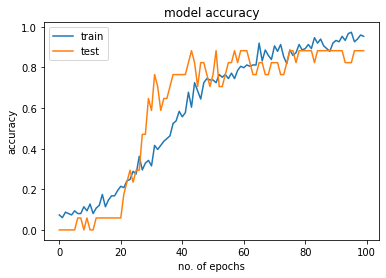

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('no. of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


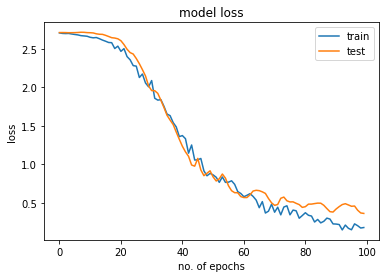

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no. of epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

###After training our accuracy is nearly 88% as seen above on test set.


##Predicting classes on the test data

If you want to see the actual predictions that our model has made for the test data, we can use the predict function. The predict function will give an array with 15 numbers. These numbers are the probabilities that the input image represents each class. The array index with the highest number represents the model prediction. The sum of each array equals 1 (since each number is a probability).

In [ ]:
predicted_classes = cnn_model.predict(X_test) #predict the classes on the test set
classes_x = np.argmax(predicted_classes,axis=1) #max output neuron --> respective class

####We will see the claases which are correctly and and incorrectly classified

In [ ]:
correct_classified_indices = np.nonzero(classes_x == y_test)[0] #compare with correct labels
incorrect_classified_indices = np.nonzero(classes_x != y_test)[0] #compare for incorrect labels

In [ ]:
print(correct_classified_indices)
#viewing the correct predicted classes

[ 0  1  3  4  5  6  7  8  9 10 11 12 13 15 16]


In [ ]:
print(incorrect_classified_indices)
#viewing the incorrect predicted classes

[ 2 14]


##The Dataset we used ie. YaleFaces had only 165 images and a CNN  model with nearly 4M parameters was giving an accuracy of 100%. which means that the model was just learning the training set.<br>
###Pros(YaleFaces) - 

*   All are Single Channeled Images(Grayscale)
*   All the Subjects' face orientation is straight<br>

###Cons(YaleFaces) - 

*   Very Few Images

Therefore we tried Another Dataset ie. Georgia Tech DataSet which has considerable amount of images and with nearly 3M parameters it gives an accuracy of nearly 88-90%.<b> The model for Georgia Tech is trained Below - </b>

## Listing the path of all the images

In [ ]:
#make an array for all the files 
PathForDatasetArr = []
dir_path = "/content/drive/MyDrive/sem 5/NFT/googleColab/dataset2/gt_db" #change for your path of the directory of the dataset

#using the os library add all the paths of the files in the specified directory to our array
for i in os.listdir(dir_path):
    for j in os.listdir(os.path.join(dir_path, i)):
        PathForDatasetArr.append(os.path.join(dir_path,os.path.join(i, j)))

In [ ]:
#here we can see that the paths of the files have been loaded into the array. For Ex - 
print(PathForDatasetArr[1])
print(len(PathForDatasetArr))

/content/drive/MyDrive/sem 5/NFT/googleColab/dataset2/gt_db/s50/05.jpg
750


## Reading each image and assigning respective labels

In [ ]:
#an array for storing all the images themselves from the path 
Arr_ImageMatrices = []

#an array for storing all the corresponding labels to said images
Arr_ImageLabels = []

###About the dataset:
We are using Georgia Tech Face Database.

<div>
<img src="https://www.researchgate.net/profile/Tarun-Gupta-23/publication/342872018/figure/fig2/AS:961257142239233@1606192970283/Sample-Images-from-Georgia-Tech-Face-Database-GTFD-16.ppm" width="600"/>
</div>


Georgia Tech face database contains images of 50 people taken in two or three sessions between 06/01/99 and 11/15/99 at the Center for Signal and Image Processing at Georgia Institute of Technology.

All people in the database are represented by 15 color JPEG images with cluttered background taken at resolution 640x480 pixels. The average size of the faces in these images is 150x150 pixels. The pictures show frontal and/or tilted faces with different facial expressions, lighting conditions and scale. Each image is manually labeled to determine the position of the face in the image. The images are stored in 50 directories s1, ..., s50. In each directory there are 15 images 01.jpg, ..., 15.jpg corresponding to one person in the database. 

Each image is manually labeled to determine the position of the face in the image.
The label files contain four integers that describe the coordinates of the face rectangles 
and a string (s1, ..., s50) indicating the identity of the face.

####Details of above:

Color Images:	Yes	
Image Size:	150x150	
Number of unique people:	50	
Number of pictures per person:	15
Different Conditions:	frontal and/or tilted faces with different facial expressions, lighting conditions and scale
Citation reference:	Ara V. Nefian and Monson H. Hayes, “Maximum likelihood training of the embedded HMM for face detection and recognition”, IEEE International Conference on Image Processing 2000.

For more information click [here.](http://www.anefian.com/research/face_reco.htm)

In [ ]:
it = 0
for i in PathForDatasetArr:
    temp_ImgRead = io.imread(i,as_grey=True,plugin="pil")#all the images are grey but still to be safer as_grey is used with python imaging library plugin
    #we use imread to read the image file and store image data(Matrix) in the array
    Arr_ImageMatrices.append(cv2.cvtColor(temp_ImgRead,cv2.COLOR_BGR2GRAY)) #for this dataset we are converting all images to single grayscale channel
    #as all the backgrounds are same for all the images --> then we increase the 3rd dimension with the help of no. of filters
    
    #the processing of data was simple in our case as the dataset had convient naming convention
    #we just split the path and made the subject value decremented by 1 (array index) as our class name or label
    temp_LabelRead = int(os.path.split(PathForDatasetArr[it])[0].split("s")[-1]) - 1
    Arr_ImageLabels.append(temp_LabelRead)
    it=it+1

In [ ]:
#we can see all the labels have been assigned correctly
print(PathForDatasetArr[99])#subject number 41 as seen in the path
print(Arr_ImageLabels[99])#labeled as person number 40 (array index  -> 10th subject)

/content/drive/MyDrive/sem 5/NFT/googleColab/dataset2/gt_db/s41/07.jpg
40


##Preprocessing: Face Detection using OpenCV and cropping the image to a size of 150 X 150

Something to be noted here is that we are using haarcascade front face classifier but from above details about the dataset we can see that there are "frontal and/or tilted faces with different facial expressions", so the data in this case will be noisier and may lead to lesser accuracy overall.

Also there is a lot more variation in the images in terms of ethnicity of people and even the images of people themselves as the facial features have change over the 2 year span that this was recorded.

Detecting all the tilted etc images and applying the filter to those would have been bulkier operation so we chose to work with a noisier dataset instead.

In [ ]:
faceDetectClassifier = cv2.CascadeClassifier("/content/drive/MyDrive/sem 5/NFT/googleColab/dataset2/haarcascade_frontalface_default.xml")

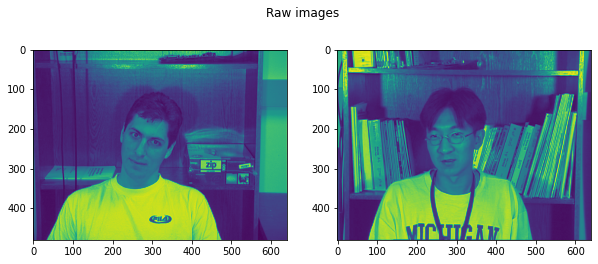

In [ ]:
#here we can see the image before filtering

#change img according to var names
fig = plt.figure(figsize=(10, 4))
fig.suptitle('Raw images')

fig.add_subplot(1, 2, 1)
plt.imshow(Arr_ImageMatrices[188])

fig.add_subplot(1, 2, 2)
plt.imshow(Arr_ImageMatrices[1])
#in the images below we can see the unprocessed images at index 188 an 1 of our images array
#and haarcascade helps in face detection and thus cropping to 150x150 sized images

In [ ]:
it = 0
#we will store the filtered images in a new array
Arr_ImageMatricesFin = []
for i in Arr_ImageMatrices:
    #we are just applying the filter to all the images and storing the output
    detectedFacePoints = faceDetectClassifier.detectMultiScale(i) #returns array of the face detection guesses
    if len(detectedFacePoints) == 0: #haarcascade faults
        x,y = 200,100 #most general face point
        print(str(it) + " -----error----- ")
    else:
        x,y = detectedFacePoints[0][:2] #extracting the top left point for the detected face
    #the images are not of desired shape so we crop into the detected face to change the size to 150x150
    croppedImg = i[y: y + 150, x: x + 150] #cropping 150px in x and y direction(left and down direction)
    Arr_ImageMatricesFin.append(croppedImg)
    it = it + 1

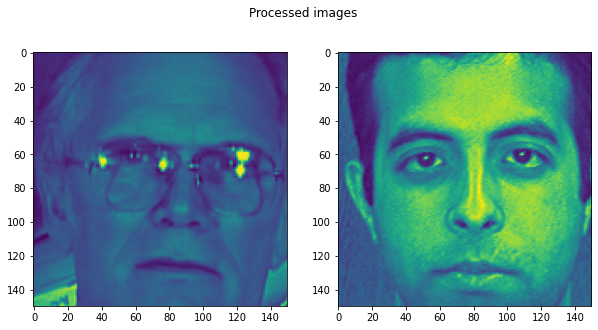

In [ ]:
#here is the image after cropping
fig = plt.figure(figsize=(10, 5))
fig.suptitle('Processed images')

fig.add_subplot(1, 2, 1)
plt.imshow(Arr_ImageMatricesFin[20])

fig.add_subplot(1, 2, 2)
plt.imshow(Arr_ImageMatricesFin[90])

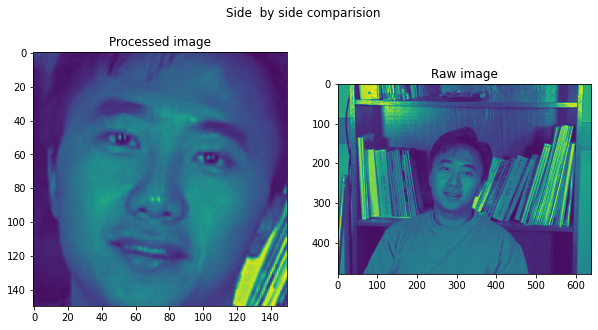

In [ ]:
#a side by side comparision:
fig = plt.figure(figsize=(10, 5))
fig.suptitle('Side  by side comparision')

fig.add_subplot(1, 2, 1)
plt.title("Processed image")
plt.imshow(Arr_ImageMatricesFin[54])

fig.add_subplot(1, 2, 2)
plt.title("Raw image")
plt.imshow(Arr_ImageMatrices[54])

#Using Convolutional Neural Network(CNN) to classify faces of subjects(students in our case - label)


## Splitting Dataset into train and test

In [ ]:
#here our test:train is 2:8 i.e. 80% of data is for training
#here we are using the sklearn module's train-test split to split our dataset for training on CNN and for testing it's accuracy
#during the split we are converting the python lists to numpy arrays to reduce the overhead book-keeping on python lists
#so that the numpy arrays help in better performance in calculations
X_train, X_test, y_train, y_test = train_test_split(np.array(Arr_ImageMatricesFin),np.array(Arr_ImageLabels), train_size=0.8, random_state = 42)

In [ ]:
#checking the dimensions after the train-test split
X_train = np.array(X_train)
X_test = np.array(X_test)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
#600 images for training and 150 images for testing

X_train shape: (600, 150, 150)
X_test shape: (150, 150, 150)


In [ ]:
#number of classes is 50
total_classes = 50
y_train = np.array(y_train) 
y_test = np.array(y_test)
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

y_train shape: (600,)
y_test shape: (150,)


In [ ]:
#np_utils.to_categorical is used to convert array of labeled data(from 0 to total_classes - 1) to one-hot vector.
Y_train = np_utils.to_categorical(y_train, total_classes)
Y_test = np_utils.to_categorical(y_test, total_classes)
print(f'Y_train shape: {Y_train.shape}')
print(f'Y_test shape: {Y_test.shape}')
#split for each class corresponding to each vector
print(f'one hot vector - {Y_train[0]}')

Y_train shape: (600, 50)
Y_test shape: (150, 50)
one hot vector - [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [ ]:
image_rows = 150 #150px height
image_cols = 150 #150px width
batch_size = 64  #train in a batch size of 64 images
im_shape=(image_rows, image_cols, 1) #Rows X Cols X 1(single channel - grayscale images)

#reshaping the matrices to that of te images
X_train = X_train.reshape(X_train.shape[0], *im_shape)
X_test = X_test.reshape(X_test.shape[0], *im_shape)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (600, 150, 150, 1)
X_test shape: (150, 150, 150, 1)


In [ ]:
#normalizing data
X_train = np.array(X_train,dtype='float32')/255 #dividing by 255(pixel range)
X_test = np.array(X_test,dtype='float32')/255 #dividing by 255(pixel range)

In [ ]:
#sanity check for the dimensions of the data to be fed to the model
print(f'X_Train - {X_train.shape}')
print(f'X_test - {X_test.shape}')
print(f'Y_train - {Y_train.shape}')
print(f'Y_test - {Y_test.shape}')

X_Train - (600, 150, 150, 1)
X_test - (150, 150, 150, 1)
Y_train - (600, 50)
Y_test - (150, 50)


#Making the model


<!-- ![pic to edit](https://qphs.fs.quoracdn.net/main-qimg-935f98c5a89271addd3c467b0c2f4311) -->

<img src="https://qphs.fs.quoracdn.net/main-qimg-935f98c5a89271addd3c467b0c2f4311" width="1000px">

In [ ]:
# import keras
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# from tensorflow.keras.optimizers import Adam
# from keras.callbacks import TensorBoard

In [ ]:
cnn_model = Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape), #kernel size -> 7x7, 36 filters, with an activation of relu
    MaxPooling2D(pool_size=2), #pooling layer -> 2x2
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= im_shape), #kernel size -> 5x5, 54 filters, with an activation of relu
    MaxPooling2D(pool_size=2), #pooling layer -> 2x2
    Conv2D(filters=63, kernel_size=5, activation='relu', input_shape= im_shape), #kernel size -> 5x5, 63 filters, with an activation of relu
    MaxPooling2D(pool_size=2), #pooling layer -> 2x2
    Conv2D(filters=72, kernel_size=3, activation='relu', input_shape= im_shape), #kernel size -> 3x3, 72 filters, with an activation of relu
    MaxPooling2D(pool_size=2), #pooling layer -> 2x2
    Flatten(), #flattening the conv layer
    Dense(1024, activation='relu'), #dense layer with 1024 neurons
    Dropout(0.5), #dropout neurons to overcome overfitting
    Dense(512, activation='relu'), #dense layer with 512 neurons
    Dropout(0.5), #dropout neurons to overcome overfitting
    #50 is the number of outputs
    Dense(50, activation='softmax')  #output layer using neurons=number of classes with softmax activation
])
 
cnn_model.compile(
    loss='categorical_crossentropy', #loss function used is -> categorical crossentropy
    optimizer=Adam(learning_rate=0.0001), #Adam Optimizer with a learning rate of 0.0001
    metrics=['accuracy'] #metrics to improve upon -> accuracy
)


###The summary of the model is given below as generated by keras.

In [ ]:
cnn_model.summary()
#printing the summary of the ConvNet Parameters

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 144, 144, 36)      1800      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 72, 72, 36)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 68, 68, 54)        48654     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 34, 34, 54)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 63)        85113     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 63)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 72)       

###Training the model

In [ ]:
history=cnn_model.fit(
    np.array(X_train), np.array(Y_train), batch_size=128,
    epochs=120, verbose=2,
    validation_data=(np.array(X_test),np.array(Y_test)),
)

Epoch 1/120
5/5 - 47s - loss: 3.9149 - accuracy: 0.0200 - val_loss: 3.9159 - val_accuracy: 0.0000e+00
Epoch 2/120
5/5 - 45s - loss: 3.9069 - accuracy: 0.0150 - val_loss: 3.9165 - val_accuracy: 0.0000e+00
Epoch 3/120
5/5 - 45s - loss: 3.9112 - accuracy: 0.0183 - val_loss: 3.9166 - val_accuracy: 0.0000e+00
Epoch 4/120
5/5 - 45s - loss: 3.9073 - accuracy: 0.0267 - val_loss: 3.9161 - val_accuracy: 0.0000e+00
Epoch 5/120
5/5 - 45s - loss: 3.9041 - accuracy: 0.0200 - val_loss: 3.9175 - val_accuracy: 0.0000e+00
Epoch 6/120
5/5 - 46s - loss: 3.9009 - accuracy: 0.0250 - val_loss: 3.9192 - val_accuracy: 0.0000e+00
Epoch 7/120
5/5 - 45s - loss: 3.8966 - accuracy: 0.0200 - val_loss: 3.9217 - val_accuracy: 0.0000e+00
Epoch 8/120
5/5 - 45s - loss: 3.8990 - accuracy: 0.0167 - val_loss: 3.9249 - val_accuracy: 0.0000e+00
Epoch 9/120
5/5 - 46s - loss: 3.8940 - accuracy: 0.0200 - val_loss: 3.9257 - val_accuracy: 0.0000e+00
Epoch 10/120
5/5 - 45s - loss: 3.8829 - accuracy: 0.0317 - val_loss: 3.9283 - val_

In [ ]:
model_score = cnn_model.evaluate( np.array(X_test),  np.array(Y_test), verbose=0)

print(f'test loss {model_score[0]:.4f}')
print(f'test accuracy {model_score[1]:.4f}')

test loss 0.5131
test accuracy 0.9067


In [ ]:
cnn_model.save("/content/drive/MyDrive/sem 5/NFT/misc/gt_model.h5")

In [ ]:
cnn_model = load_model("/content/drive/MyDrive/sem 5/NFT/misc/gt_model.h5")

###After training our accuracy is nearly 90% as seen above.


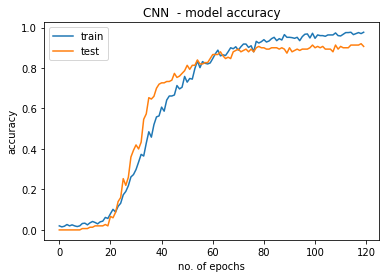

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN  - model accuracy')
plt.ylabel('accuracy')
plt.xlabel('no. of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

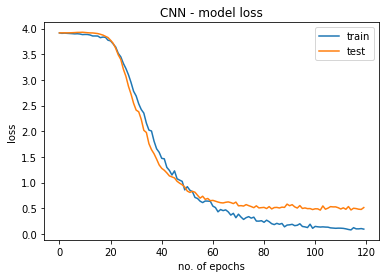

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN - model loss')
plt.ylabel('loss')
plt.xlabel('no. of epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

##Predicting classes on the test data

In [ ]:
predicted_classes = cnn_model.predict(X_test) #predict the classes on the test set
classes_x=np.argmax(predicted_classes,axis=1) #max output neuron --> respective class

####We will see the claases which are correctly and and incorrectly classified

In [ ]:
correct_classified_indices = np.nonzero(classes_x == y_test)[0] #compare with correct labels
incorrect_classified_indices = np.nonzero(classes_x != y_test)[0] #compare with incorrect labels

In [ ]:
correct_classified_indices #viewing the correct predicted classes

array([  0,   1,   3,   4,   5,   6,   7,   8,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  62,  64,  65,  66,  67,  68,
        69,  71,  72,  73,  74,  75,  76,  78,  80,  81,  82,  83,  84,
        86,  87,  89,  90,  91,  92,  93,  95,  96,  97,  98,  99, 100,
       102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 147, 148, 149])

In [ ]:
incorrect_classified_indices #viewing the incorrect predicted classes

array([  2,   9,  61,  63,  70,  77,  79,  85,  88,  94, 101, 107, 116,
       146])

In [ ]:
pip install gspread==4.0.0 #to mark the attendance in google sheets

#To integrate above into a workable attendance system using google sheets
### Here we have created a google spreadsheet with the names of the 50 students and their attendance for the day which gets automatically marked by the below snippets converting into a full-fleged model





In [ ]:
attend = [] #class number list for atttendance
for i in range(len(classes_x)):
  if classes_x[i] == y_test[i]: #correctly classified are marked
    attend.append(classes_x[i])

p_list = []
[p_list.append(x) for x in attend if x not in p_list] #remove duplicates

for i in range(len(p_list)):
  p_list[i] += 1 #index + 1 for sheets

#printing the people who are present(their class number)
print(p_list)

[16, 29, 33, 38, 3, 27, 39, 20, 41, 28, 40, 10, 31, 32, 45, 24, 18, 26, 25, 44, 9, 13, 43, 23, 42, 14, 21, 30, 50, 48, 15, 17, 47, 37, 8, 2, 4, 11, 49, 34, 5, 6, 12, 35, 36, 7, 22, 46]


In [ ]:
import gspread
from gspread_formatting import *

gc = gspread.service_account(filename='/content/drive/MyDrive/Colab Notebooks/Final-Folder/credentials.json') #load credentials
sh = gc.open_by_key('1dMZPunwMGShaGjN0wUXqe4Qq0jbuE1M4EkbLRXlbHKQ') #load API key
worksheet = sh.sheet1 #name of the sheet

res = worksheet.get_all_values() #fetch all data from spreadsheet

# Present List
#p_list = [1,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29,30,31,32,33,34,35,36,37,50] #students that are present(labels)

t_list = [False]*51 #present column

for i in p_list: #mark the attendance in array
    t_list[i]=True

fmt = cellFormat(                                                               
    backgroundColor=color(1, 1, 0),
    textFormat=textFormat(bold=False, foregroundColor=color(0, 0, 0)),
    horizontalAlignment='CENTER'
    )

for i in range (1,51):
    cell_range='A'+str(i+1)+':C'+str(i+1) #cell range to mark
    if t_list[i]:
        worksheet.update_cell(i+1,3,'Present') #mark present
    else:
        format_cell_range(worksheet, cell_range, fmt)
        worksheet.update_cell(i+1,3,'Absent') #mark absent

###Refreshing the sheet to detect any changes

In [ ]:
#spreadsheet reset code for any correction or to mark a new day's attendance

fmt_refresh = cellFormat(
    backgroundColor=color(1, 1, 1),
    textFormat=textFormat(bold=False, foregroundColor=color(0, 0, 0)),
    horizontalAlignment='CENTER'
    )

for i in range (1,51):
    cell_range='A'+str(i+1)+':C'+str(i+1)                       
    format_cell_range(worksheet, cell_range, fmt_refresh)      
   # worksheet.update_cell(i+1,3,'--')